In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C://Users//annal//aim//static//csv//Forbes_Billionaires.csv")
print(df.columns)

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


# Определим бизнес цели:
## 1- Прогнозирование состояния миллиардера(регрессия)
## 2- Прогнозирование возраста миллиардера(классификация)


# Проверим данные на пустые значения

In [2]:
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

Rank        False
Name        False
Networth    False
Age         False
Country     False
Source      False
Industry    False
dtype: bool



In [51]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Задача регрессии

# Создадим выборки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("C://Users//annal//aim//static//csv//Forbes_Billionaires.csv")
X = df.drop(columns=['Networth','Rank ', 'Name'])  # Признаки
y = df['Networth']  # Целевая переменная для регрессии

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Формирование конвейера для классификации данных
## preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация
## preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование
## features_preprocessing -- трансформер для предобработки признаков
## features_engineering -- трансформер для конструирования признаков
## drop_columns -- трансформер для удаления колонок
## pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Исправляем ColumnTransformer с сохранением имен колонок
columns_to_drop = []

num_columns = [
    column
    for column in X_train.columns
    if column not in columns_to_drop and X_train[column].dtype != "object"
]
cat_columns = [
    column
    for column in X_train.columns
    if column not in columns_to_drop and X_train[column].dtype == "object"
]

# Предобработка числовых данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Предобработка категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Общая предобработка признаков
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=True,  # Сохраняем имена колонок
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="drop"  # Убираем неиспользуемые столбцы
)

# Итоговый конвейер
pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
    ]
)

# Преобразуем данные
preprocessing_result = pipeline_end.fit_transform(X_train)

# Создаем DataFrame с правильными именами колонок
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
    index=X_train.index,  # Сохраняем индексы
)

preprocessed_df

prepocessing_num__Age  prepocessing_cat__Country_Argentina  \
582               -0.109934                                  0.0   
48                 1.079079                                  0.0   
1772               1.004766                                  0.0   
964               -0.407187                                  0.0   
2213               1.302019                                  0.0   
...                     ...                                  ...   
1638               1.227706                                  0.0   
1095               0.856139                                  0.0   
1130               0.781826                                  0.0   
1294               0.335946                                  0.0   
860                0.558886                                  0.0   

      prepocessing_cat__Country_Australia  prepocessing_cat__Country_Austria  \
582                                   0.0                                0.0   
48                                    0.0                                0.0   
1772                                  1.0                                0.0   
964                                   0.0                                0.0   
2213                                  0.0                                0.0   
...                                   ...                                ...   
1638                                  0.0                                0.0   
1095                                  0.0                                0.0   
1130                                  0.0                                0.0   
1294                                  0.0                                0.0   
860                                   0.0                                0.0   

      prepocessing_cat__Country_Barbados  prepocessing_cat__Country_Belgium  \
582                                  0.0                                0.0   
48                                   0.0                                0.0   
1772                                 0.0                                0.0   
964                                  0.0                                0.0   
2213                                 0.0                                0.0   
...                                  ...                                ...   
1638                                 0.0                                0.0   
1095                                 0.0                                0.0   
1130                                 0.0                                0.0   
1294                                 0.0                                0.0   
860                                  0.0                                0.0   

      prepocessing_cat__Country_Belize  prepocessing_cat__Country_Brazil  \
582                                0.0                               0.0   
48                                 0.0                               0.0   
1772                               0.0                               0.0   
964                                0.0                               0.0   
2213                               0.0                               1.0   
...                                ...                               ...   
1638                               0.0                               0.0   
1095                               0.0                               1.0   
1130                               0.0                               0.0   
1294                               0.0                               0.0   
860                                0.0                               0.0   

      prepocessing_cat__Country_Bulgaria  prepocessing_cat__Country_Canada  \
582                                  0.0                               0.0   
48                                   0.0                               0.0   
1772                                 0.0                               0.0   
964                                  0.0              

# Формирование набора моделей
## LinearRegression -- логистическая регрессия
## RandomForestRegressor -- метод случайного леса (набор деревьев решений)
## GradientBoostingRegressor -- метод градиентного бустинга (набор деревьев решений)
# Обучение этих моделей с применением RandomizedSearchCV(для подбора гиперпараметров)

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

random_state = 42

# Модели и параметры
models_regression = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=random_state),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=random_state)
}

param_grids_regression = {
    "LinearRegression": {},
    "RandomForestRegressor": {
        'model__n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
        'model__max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9 ,10],
    },
    "GradientBoostingRegressor": {
        'model__n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
        'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9 ,10]
    }
}

# Результаты
results_regression = {}

# Перебор моделей
for name, model in models_regression.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[
        ('features_preprocessing', features_preprocessing),
        ('model', model)
    ])
    param_grid = param_grids_regression[name]
    grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Лучшая модель
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Сохранение результатов
    results_regression[name] = {
        "Best Params": grid_search.best_params_,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

# Печать результатов
for name, metrics in results_regression.items():
    print(f"\nModel: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Training LinearRegression...


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training RandomForestRegressor...


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training GradientBoostingRegressor...

Model: LinearRegression
Best Params: {}
MAE: 18059903.80176681
RMSE: 411829080.6584508
R2: -7135788186375614.0

Model: RandomForestRegressor
Best Params: {'model__n_estimators': 40, 'model__max_depth': 10}
MAE: 3.454630023161808
RMSE: 7.755775760541111
R2: -1.530803448377045

Model: GradientBoostingRegressor
Best Params: {'model__n_estimators': 100, 'model__max_depth': 4, 'model__learning_rate': 0.4}
MAE: 3.585784679817764
RMSE: 10.312249036012052
R2: -3.474193004771121


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [14]:
# Импортируем pandas для работы с таблицами
import pandas as pd

# Формируем таблицу метрик
reg_metrics = pd.DataFrame.from_dict(results_regression, orient="index")[
    ["MAE", "RMSE", "R2"]
]

# Визуализация результатов с помощью стилизации
styled_metrics = (
    reg_metrics.sort_values(by="RMSE")
    .style.background_gradient(cmap="viridis", low=1, high=0.3, subset=["RMSE", "MAE"])
    .background_gradient(cmap="plasma", low=0.3, high=1, subset=["R2"])
)

styled_metrics

## Шикарный вывод: по стране, возрасту, сфере деятельности и источнику доходов невозможно предсказать состояние человека. Значит ли это, что кто угодно, где угодно, и в чём угодно может добиться успеха?

# Классификация

# Категоризируем колонку возраста миллиардеров

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C://Users//annal//aim//static//csv//Forbes_Billionaires.csv")

bins = [0, 30, 40, 50, 60, 70, 80, 101]  # границы для возрастных категорий
labels = ['Under 30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']  # метки для категорий

df["Age_category"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Удаляем оригинальные колонки 'country', 'industry' и 'source' из исходного DataFrame
df.drop(columns=['Age'], inplace=True)

# Просмотр результата
print(df.head())

   Rank                        Name  Networth        Country  \
0      1                 Elon Musk      219.0  United States   
1      2                Jeff Bezos      171.0  United States   
2      3  Bernard Arnault & family      158.0         France   
3      4                Bill Gates      129.0  United States   
4      5            Warren Buffett      118.0  United States   

               Source                Industry Age_category  
0       Tesla, SpaceX             Automotive         50-60  
1              Amazon             Technology         50-60  
2                LVMH       Fashion & Retail         70-80  
3           Microsoft             Technology         60-70  
4  Berkshire Hathaway  Finance & Investments           80+  


# Создадим выборки

In [ ]:
X = df.drop(columns=['Age_category','Rank ', 'Name'])  # Признаки
# Целевая переменная для классификации
y_class = df['Age_category']  

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Вновь запустим конвейер

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Исправляем ColumnTransformer с сохранением имен колонок
columns_to_drop = []

num_columns = [
    column
    for column in X_train_clf.columns
    if column not in columns_to_drop and X_train_clf[column].dtype != "object"
]
cat_columns = [
    column
    for column in X_train_clf.columns
    if column not in columns_to_drop and X_train_clf[column].dtype == "object"
]

# Предобработка числовых данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Предобработка категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Общая предобработка признаков
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=True,  # Сохраняем имена колонок
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="drop"  # Убираем неиспользуемые столбцы
)

# Итоговый конвейер
pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
    ]
)

# Преобразуем данные
preprocessing_result = pipeline_end.fit_transform(X_train_clf)

# Создаем DataFrame с правильными именами колонок
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
    index=X_train_clf.index,  # Сохраняем индексы
)

preprocessed_df

prepocessing_num__Networth  prepocessing_cat__Country_Argentina  \
582                    -0.013606                                  0.0   
48                      1.994083                                  0.0   
1772                   -0.288162                                  0.0   
964                    -0.159464                                  0.0   
2213                   -0.322481                                  0.0   
...                          ...                                  ...   
1638                   -0.271002                                  0.0   
1095                   -0.193783                                  0.0   
1130                   -0.193783                                  0.0   
1294                   -0.228103                                  0.0   
860                    -0.133724                                  0.0   

      prepocessing_cat__Country_Australia  prepocessing_cat__Country_Austria  \
582                                   0.0                                0.0   
48                                    0.0                                0.0   
1772                                  1.0                                0.0   
964                                   0.0                                0.0   
2213                                  0.0                                0.0   
...                                   ...                                ...   
1638                                  0.0                                0.0   
1095                                  0.0                                0.0   
1130                                  0.0                                0.0   
1294                                  0.0                                0.0   
860                                   0.0                                0.0   

      prepocessing_cat__Country_Barbados  prepocessing_cat__Country_Belgium  \
582                                  0.0                                0.0   
48                                   0.0                                0.0   
1772                                 0.0                                0.0   
964                                  0.0                                0.0   
2213                                 0.0                                0.0   
...                                  ...                                ...   
1638                                 0.0                                0.0   
1095                                 0.0                                0.0   
1130                                 0.0                                0.0   
1294                                 0.0                                0.0   
860                                  0.0                                0.0   

      prepocessing_cat__Country_Belize  prepocessing_cat__Country_Brazil  \
582                                0.0                               0.0   
48                                 0.0                               0.0   
1772                               0.0                               0.0   
964                                0.0                               0.0   
2213                               0.0                               1.0   
...                                ...                               ...   
1638                               0.0                               0.0   
1095                               0.0                               1.0   
1130                               0.0                               0.0   
1294                               0.0                               0.0   
860                                0.0                               0.0   

      prepocessing_cat__Country_Bulgaria  prepocessing_cat__Country_Canada  \
582                                  0.0                               0.0   
48                                   0.0                               0.0   
1772                                 0.0                               0

# Формирование набора моделей
## LogisticRegression -- логистическая регрессия
## RandomForestClassifier -- метод случайного леса (набор деревьев решений)
## KNN -- k-ближайших соседей
# Обучение этих моделей с применением RandomizedSearchCV(для подбора гиперпараметров)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Модели и параметры
models_classification = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

param_grids_classification = {
    "LogisticRegression": {
        'model__C': [0.1, 1, 10]
    },
    "RandomForestClassifier": {
        "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
        "model__max_features": ["sqrt", "log2", 2],
        "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10, 20],
        "model__criterion": ["gini", "entropy", "log_loss"],
        "model__class_weight": ["balanced"]
    },
    "KNN": {
        'model__n_neighbors': [3, 5, 7, 9, 11],
        'model__weights': ['uniform', 'distance']
    }
}

# Результаты
results_classification = {}

# Перебор моделей
for name, model in models_classification.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[
        ('features_preprocessing', features_preprocessing),
        ('model', model)
    ])
    param_grid = param_grids_classification[name]
    grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_clf, y_train_clf)

    # Лучшая модель
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_clf)

    # Метрики
    acc = accuracy_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred, average="macro")

    # Вычисление матрицы ошибок
    c_matrix = confusion_matrix(y_test_clf, y_pred)

    # Сохранение результатов
    results_classification[name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion_matrix": c_matrix
    }

# Печать результатов
for name, metrics in results_classification.items():
    print(f"\nModel: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Training LogisticRegression...


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training RandomForestClassifier...


c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training KNN...

Model: LogisticRegression
Best Params: {'model__C': 0.1}
Accuracy: 0.3903846153846154
F1 Score: 0.20313635491500218
Confusion_matrix: [[ 0  1  2  6  1  0  0]
 [ 0  1 27 18  7  0  0]
 [ 0  1 82 35 13  3  0]
 [ 0  1 45 80 34  4  0]
 [ 0  0 15 51 37  4  0]
 [ 0  0  5 28 14  3  0]
 [ 0  0  0  2  0  0  0]]

Model: RandomForestClassifier
Best Params: {'model__n_estimators': 200, 'model__max_features': 'sqrt', 'model__max_depth': 7, 'model__criterion': 'gini', 'model__class_weight': 'balanced'}
Accuracy: 0.29615384615384616
F1 Score: 0.23917948939202166
Confusion_matrix: [[ 2  3  1  1  0  1  2]
 [ 1 21 11  4  2 14  0]
 [ 1 18 65  7 12 31  0]
 [ 2 23 35 12 20 70  2]
 [ 1  4 12  3 20 65  2]
 [ 0  5  1  5  5 34  0]
 [ 1  0  0  1  0  0  0]]

Model: KNN
Best Params: {'model__weights': 'uniform', 'model__n_neighbors': 3}
Accuracy: 0.32884615384615384
F1 Score: 0.23870853259159636
Confusion_matrix: [[ 3  0  4  2  1  0  0]
 [ 4 19 13 10  6  1  0]
 [ 8 14 65 27 15  5  0]
 [ 9 14 49 53

c:\Users\annal\aim\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\annal\aim\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Покажем матрицы в виде диаграмм

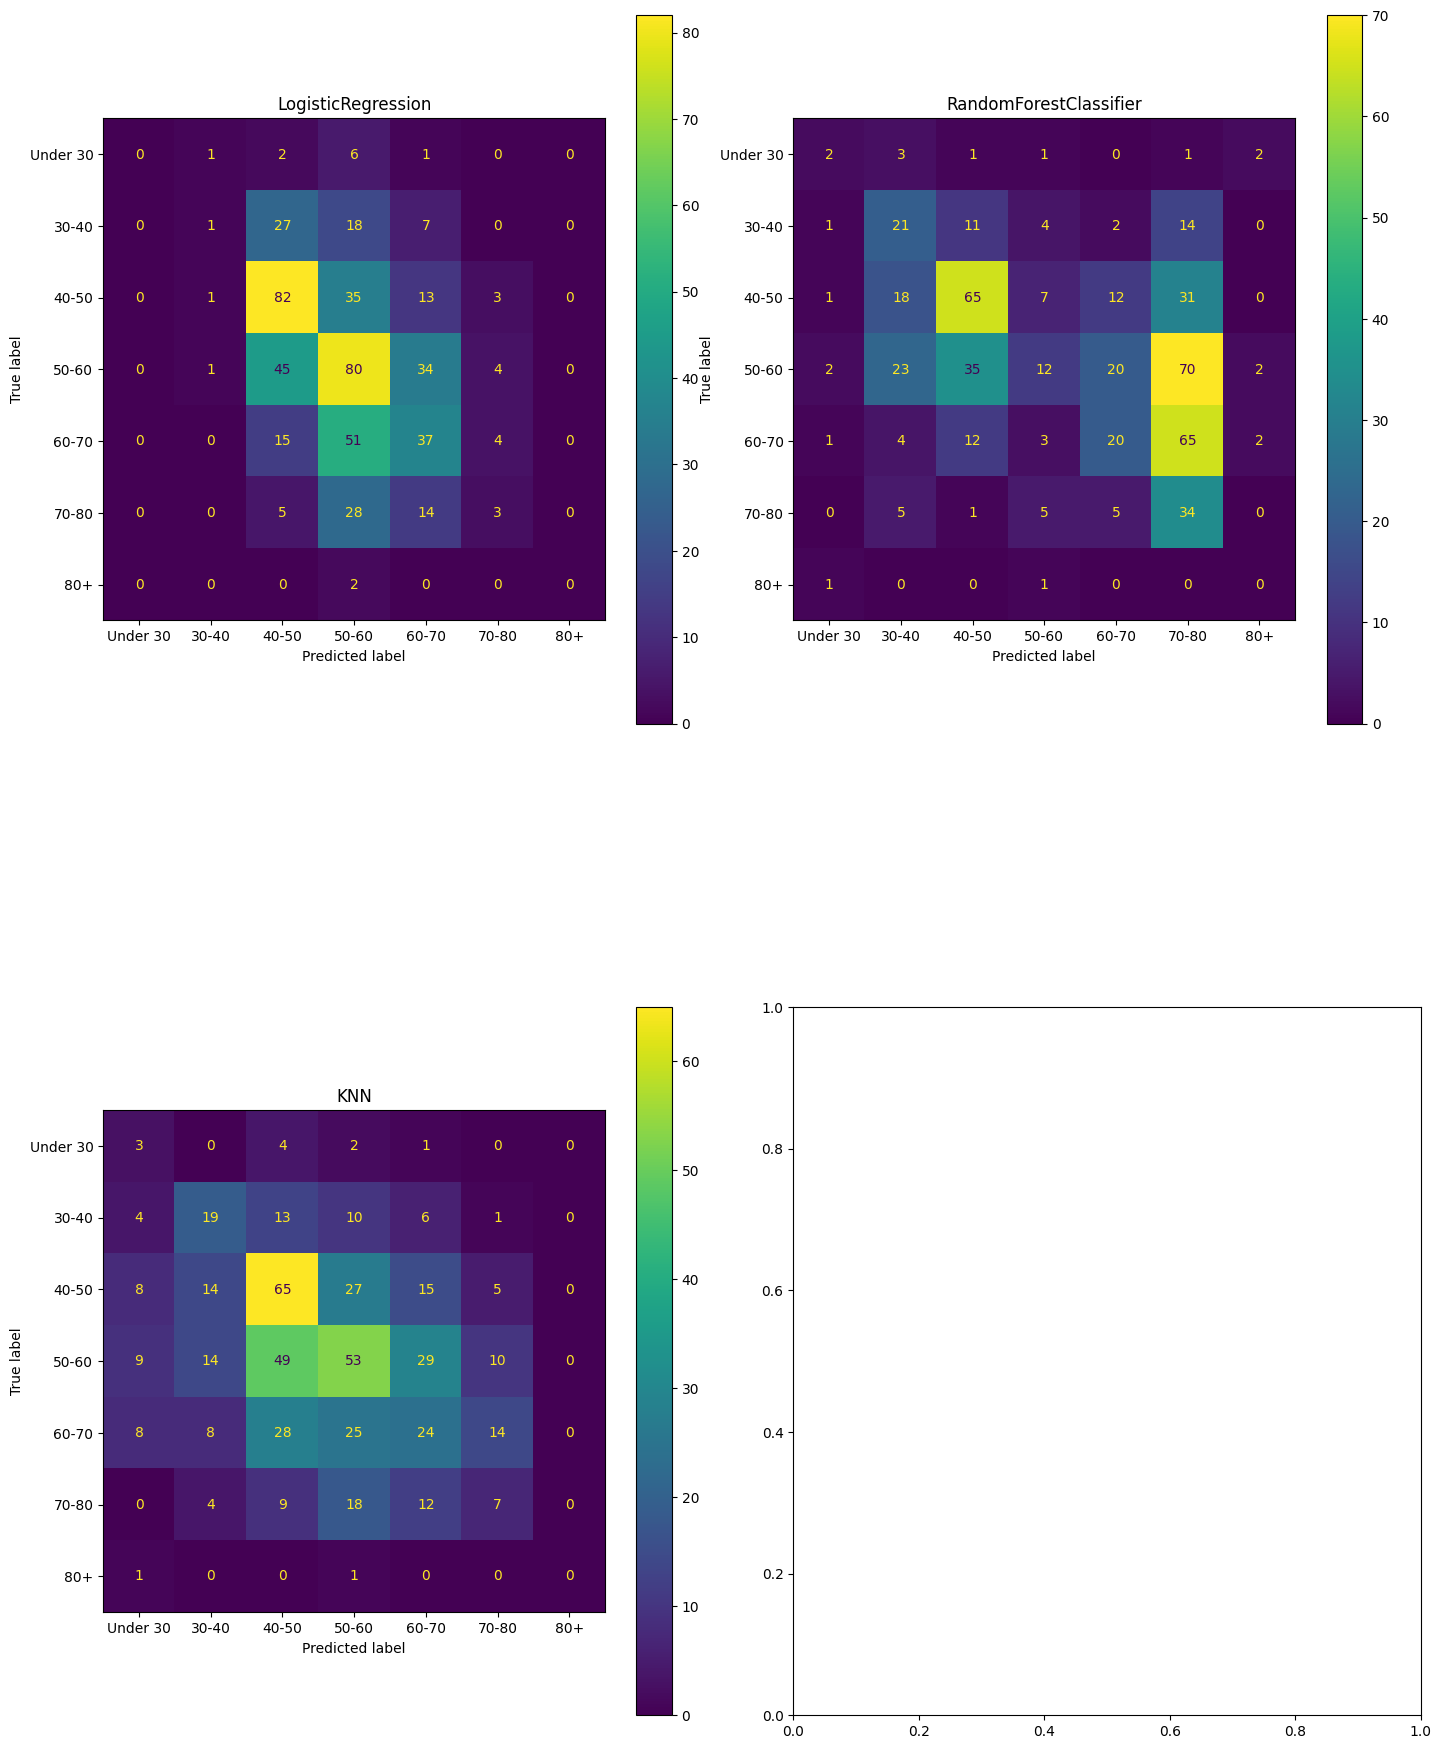

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay


num_models = len(results_classification)
num_rows = (num_models // 2) + (num_models % 2)  # Количество строк для подграфиков
_, ax = plt.subplots(num_rows, 2, figsize=(17, 17), sharex=False, sharey=False)

for index, (name, metrics) in enumerate(results_classification.items()):
    c_matrix = metrics["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Under 30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(name)

# Корректировка расположения графиков
plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

# Вывод: возраст удалось предсказать чуть успешнее. Но всё же, датасет не имеет в себе необходимых данных для более точных предсказаний